In [29]:
#Andiswa Nyongwana
#Student No.: st10314980
!pip install tensorflow

In [2]:
import os
from PIL import Image, UnidentifiedImageError
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
from google.colab import files #Uploading the Data zip file with the training and testing data
uploaded = files.upload()

Saving Data.zip to Data.zip


In [25]:



image_directory = '/content/dataset/Data'

# Directory to move corrupt images. Some of the images are corrupt
corrupt_image_dir = '/content/dataset/CorruptImages'
if not os.path.exists(corrupt_image_dir):
    os.makedirs(corrupt_image_dir)

# Function to check and remove corrupt images
def remove_corrupt_images(image_dir):
    for subdir, dirs, files in os.walk(image_dir):
        for file in files:
            image_path = os.path.join(subdir, file)
            # Only check files with valid image extensions
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                try:
                    with Image.open(image_path) as img:
                        img.verify()  # Verify that the image is not corrupt
                except (UnidentifiedImageError, IOError, SyntaxError):
                    print(f"Corrupt image detected and removing: {image_path}")
                    # Move corrupt image to a separate directory
                    shutil.move(image_path, os.path.join(corrupt_image_dir, file))

# Remove corrupt images before training
remove_corrupt_images(image_directory)

# Initialize ImageDataGenerator for loading and augmenting data
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Define training and validation data generators
train_generator = train_datagen.flow_from_directory(
    image_directory,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    image_directory,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Calculating steps per epoch and validation steps
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

# Evaluate the model on validation data
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")


Found 123 images belonging to 2 classes.
Found 29 images belonging to 2 classes.
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 820ms/step - accuracy: 0.6053 - loss: 0.7699 - val_accuracy: 0.6207 - val_loss: 0.6818
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.6250 - loss: 0.6558 - val_accuracy: 0.4138 - val_loss: 0.7335
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 424ms/step - accuracy: 0.5264 - loss: 0.6942 - val_accuracy: 0.6207 - val_loss: 0.6455
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - accuracy: 0.6250 - loss: 0.6256 - val_accuracy: 0.5862 - val_loss: 0.6346
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 652ms/step - accuracy: 0.6147 - loss: 0.6179 - val_accuracy: 0.6207 - val_loss: 0.6232
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 759ms/step - accuracy: 0.5938 - loss: 0.5986 - val_accuracy: 0.6207 - val_loss: 0.6240
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 440ms/step - accuracy: 0.7550 - loss: 0.5799 - val_accuracy: 0.7241 - val_loss: 0.6170
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1

Model has 69% accuracy rate

Found 63 images belonging to 2 classes.
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step


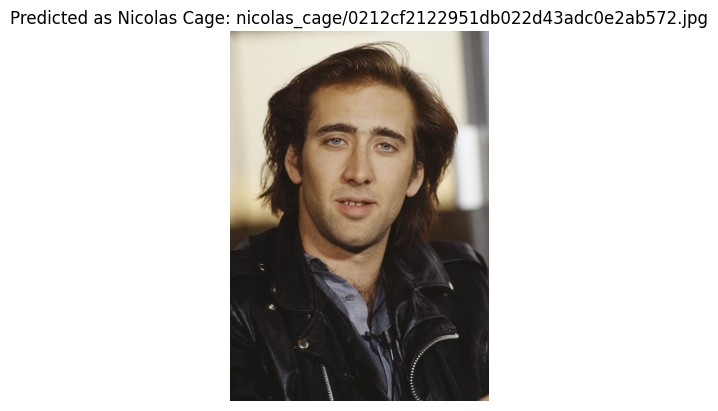

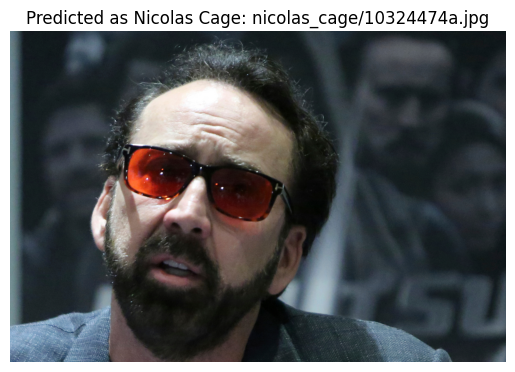

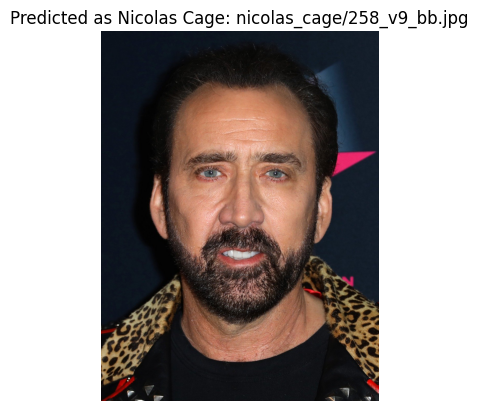

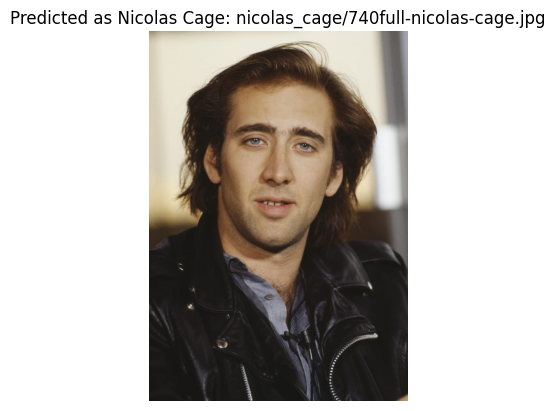

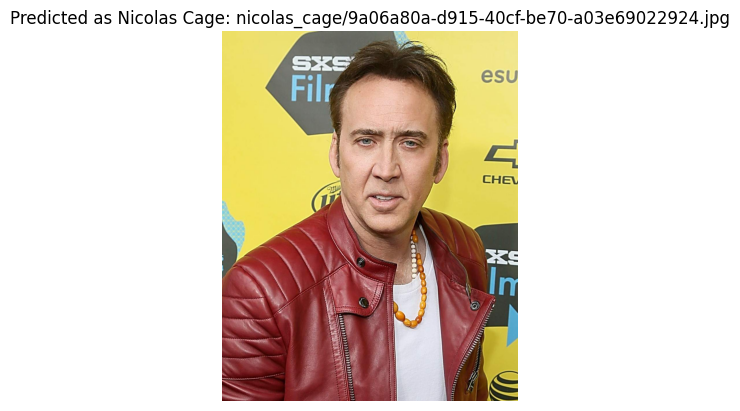

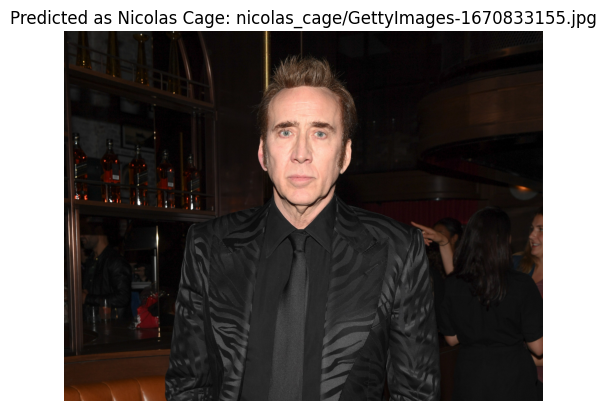

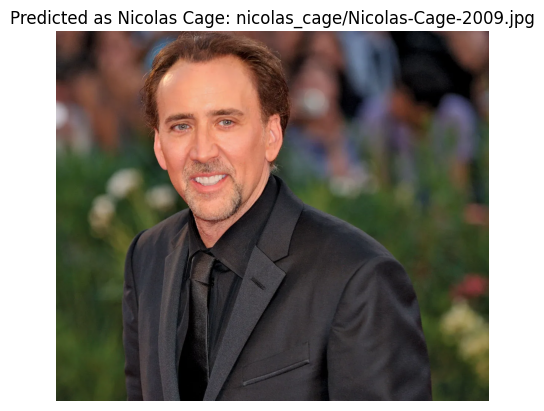

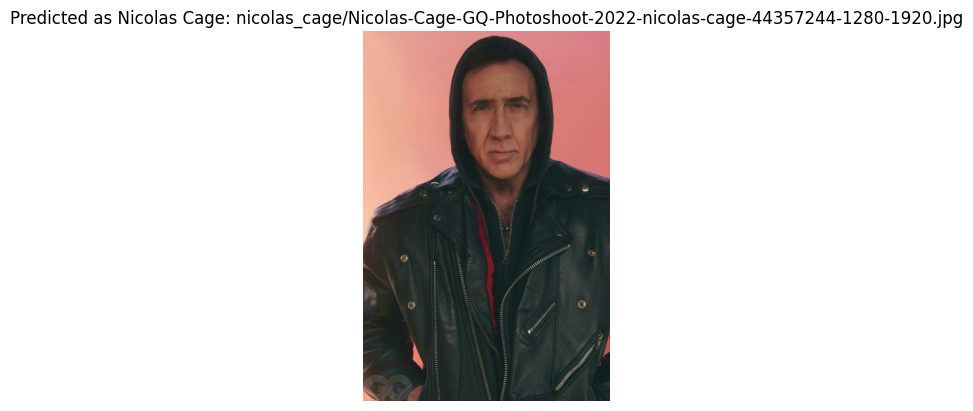

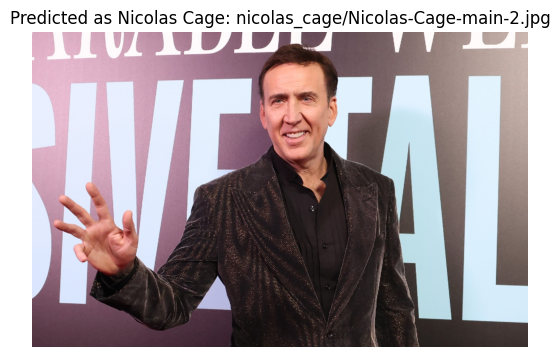

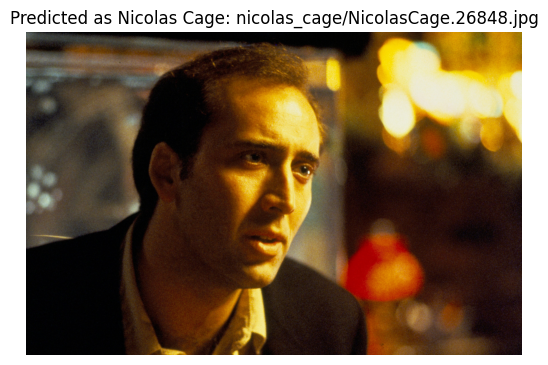

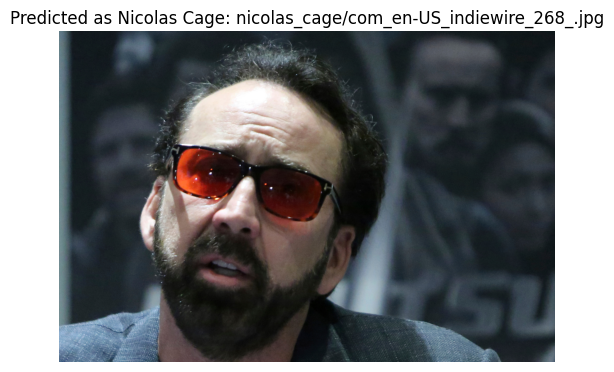

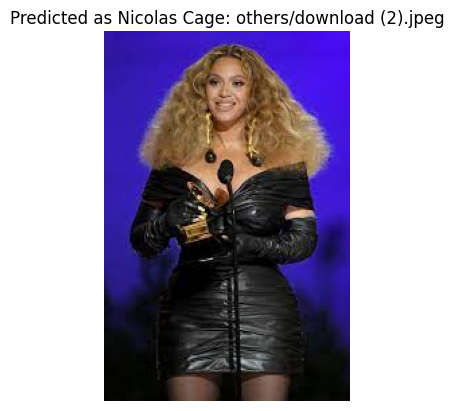

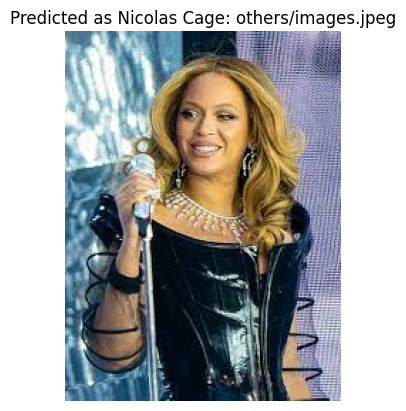

In [28]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to dataset directory (where test images are located)
image_directory = '/content/dataset/Data/test'

# Define the target size of the images
image_size = (64, 64)

# Load the test images using ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    image_directory,
    target_size=image_size,
    batch_size=1,  # One image at a time
    class_mode=None,  # No labels, we just want to predict
    shuffle=False
)

# Make predictions using the model
predictions = model.predict(test_generator)

# Get the filenames of the test images
filenames = test_generator.filenames

# The model outputs 1 for Nicolas Cage and 0 for the other class
nicolas_cage_label = 1

# Function to display identified Nicolas Cage images
def display_nicolas_cage_images(filenames, predictions, image_directory):
    for i, prediction in enumerate(predictions):
        # Check if the predicted class is Nicolas Cage (close to 1)
        if prediction > 0.5:  # Adjust threshold if necessary
            image_path = os.path.join(image_directory, filenames[i])
            img = Image.open(image_path)
            plt.imshow(img)
            plt.title(f"Predicted as Nicolas Cage: {filenames[i]}")
            plt.axis('off')
            plt.show()

# Display the images predicted to be Nicolas Cage
display_nicolas_cage_images(filenames, predictions, image_directory)
